# Predicting Fraudulent Credit Card Transactions
## Scikit Learn's Random Forest Classifier

### Importing the relevant packages and looking at the data

Pandas for working with DataFrames, numpy for linear algebra, seaborn and matplotlib for plotting data.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Loading and getting a first look at the data

Columns V1-V28 are features which have been undergone PCA transformation to retain privacy. As such, there should be no correlation between them and a correlation matrix would not be informative. 

In [2]:
data = pd.read_csv("~/Desktop/DataScience/Datasets/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Number of rows and columns, and distribution of items per column

In [4]:
print("Dataset Shape: ", data.shape)

Dataset Shape:  (284807, 31)


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Fraudulent vs Regular Transactions

Only 0.17% of all transactions are fraudulent.
The data is highly unbalanced and this needs to be taken into consideration when comparing scores for our model.
A simple accuracy score would not be good for measuring the quality of our model, given that a good accuracy score can be achieved by simply classifying all transactions as non-fraudulent.

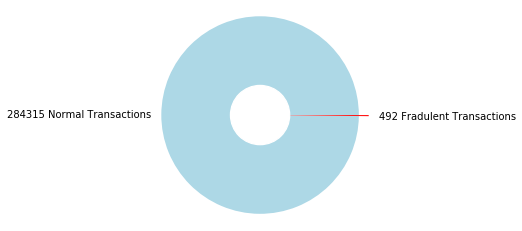

In [6]:
fraud = data.loc[data['Class'] == 1]
notfraud = data.loc[data['Class'] == 0]
fraud_percent = round(len(fraud)/(len(notfraud)+len(fraud)) * 100, 2)


#Donut plot using Matplotlib


labels = str(len(notfraud)) + ' Normal Transactions', str(len(fraud)) + ' Fraudulent Transactions'
sizes = [len(notfraud), len(fraud)]
colors = ['lightblue', 'red']
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors)
centre_circle = plt.Circle((0,0),0.3,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()  


### Comparing Amount Distribution, Fraudulent vs Regular Transactions

There is a notable difference in the distribution of transaction amounts for fraudulent (1) vs non-fraudulent (0) transactions.

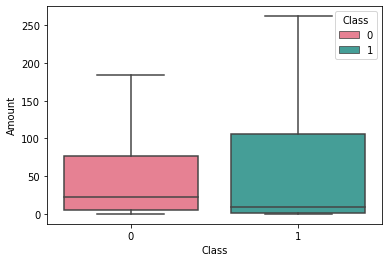

In [7]:
sns.boxplot(x="Class", y="Amount", hue="Class",data=data, palette="husl",showfliers=False, dodge=False)
plt.show()

### Random Forest with Scikit Learn

We will be using Scikit Learn's Random Forest Classifier. 
I've separated the data into features (featrs) and labels (lbls).
The label is the 'Class' column, which tells us whether the transaction was fraudulent (1) or not (0).
The random forest classifier will try to determine whether a transaction is fraudulent based on the features, V1-V28, Time, and Amount (the remaining columns).

In [8]:
from sklearn.model_selection import train_test_split

#variable "label" was already defined, hence the abbreviations.

lbls = 'Class'
featrs = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

X = data[featrs]
y = data[lbls]

### Splitting the Data
We now split our data, first into a training set and a testing set.
We further split the training set to create a validation set for both X and y, the features and labels.

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1, shuffle = True)

### Create a Gaussian Classifier and Fit the Model

In [10]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf= RandomForestClassifier(n_estimators=100, random_state = 1)

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [12]:
y_pred = clf.predict(X_validate)

### Features Importance

We graph the importance of each feature in determining whether a transaction is fraudulent or not.
The most importance features are V17, V14, V12, and V16.

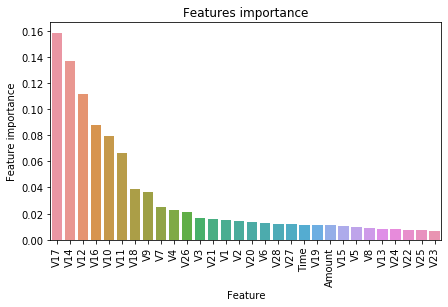

In [13]:
tmp = pd.DataFrame({'Feature': featrs, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance')
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()   


### Confusion Matrix
The Confusion Matrix below tells us how well the model did in comparison with the real data.

Our model classified 60 transactions as fraudulent, which our data validated to be truly fraudulent (True Positives).
Our model also classified 5 regular transactions as fraudulent (False Positives or Type I errors), and wrongfully classified 17 fraudulent transactions as normal (False Negatives or Type II errors).

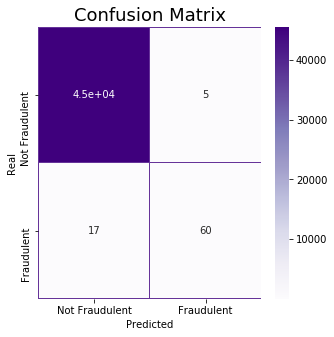

In [14]:
cm = pd.crosstab(y_validate.values, y_pred, rownames=['Real'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraudulent', 'Fraudulent'],
            yticklabels=['Not Fraudulent', 'Fraudulent'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="rebeccapurple", cmap="Purples")
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### AUC Score and F1 Score
The Area Under the Receiver Operating Characteristic Curve gives us a good idea of how effective our model is at all classification thresholds.
The F1 Score is the harmonic mean of the True Positive Rate (Recall) and the Positive Predictive Value (Precision).
Both scores are between 0 and 1. A model with 100% predictive capacity has a score of 1.


In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [16]:
roc_auc_score(y_validate.values, y_pred)

0.8895554348930768

In [17]:
f1_score(y_validate.values, y_pred)

0.8450704225352113

Let's compare these scores with a simple accuracy score, which should be elevated due to the unbalanced dataset.

In [18]:
accuracy_score(y_validate.values, y_pred)

0.9995172156509908

### Conclusion

The Random Forest Classifier model achieved fairly good AUC and F1 Scores. As expected, the accuracy score was not a good measure of the quality of our model.

## Citations

[Credit Card Fraud Detection Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)

[Credit Card Fraud Detection Predictive Models by Gabriel Preda](https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models)
